# Algoritmo para remover silencio do ESC 10

In [1]:
import librosa
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [7, 4], 
    'axes.labelsize': 12,
    'axes.titlesize':16, 
    'font.size': 12,
    'legend.fontsize': 12, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10
}
plt.rcParams.update(params)

## Parâmetros Iniciais

In [3]:
dirOrigem  = "/home/dimi/Downloads/datasets/ESC_10_16kHz_8bits/audio_com_silencio/"
dirDestino = "/home/dimi/Downloads/datasets/ESC_10_16kHz_8bits/audio/"
audiosOriginais = os.listdir(dirOrigem)

In [4]:
def plotarSinal(sinal, titulo):
    plt.plot(sinal)
    plt.grid(alpha=0.5)
    plt.title(titulo)
    plt.ylabel("Amplitude")
    plt.xlabel("Amostras")
    plt.show()

## Demonstração

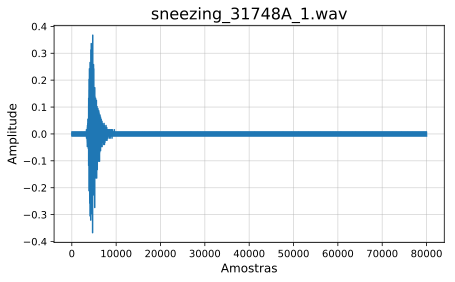

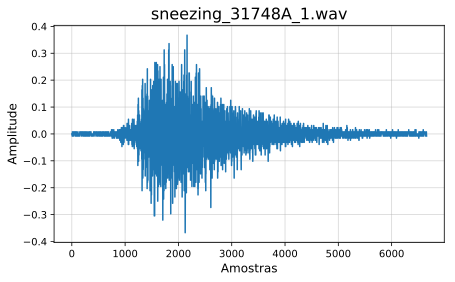

In [5]:
# ORIGINAL
audioEscolhido = audiosOriginais[random.randint(0,len(audiosOriginais)-1)]
sinalOriginal, freqAmostragem = librosa.load(dirOrigem + audioEscolhido, sr=None, mono=True)
plotarSinal(sinalOriginal, audioEscolhido)

# OBTENDO INTERVALOS SEM SILENCIO
intervalosSemSilencio = librosa.effects.split(sinalOriginal, top_db=25)
sinalSemSilencio = []
for intervaloAtual in intervalosSemSilencio:
    sinalSemSilencio.extend(sinalOriginal[intervaloAtual[0]:intervaloAtual[1]])
sinalSemSilencio = np.array(sinalSemSilencio)
    
# PLOTANDO APOS PROCESSAMENTO
plotarSinal(sinalSemSilencio, audioEscolhido)

## Duração do dataset antes da modificação

In [6]:
def obterDuracao(caminhoAudio):
    sinalOriginal, freqAmostragem = librosa.core.load(caminhoAudio, sr=None, mono=True)
    return librosa.get_duration(y=sinalOriginal, sr=freqAmostragem)

In [7]:
tempos = Parallel(n_jobs=-1)(delayed(obterDuracao)(dirOrigem + audioAtual) for audioAtual in audiosOriginais)
totalAntes = np.sum(tempos)
print("Tempo total do dataset antes da modificação:", totalAntes, "segundos.")

Tempo total do dataset antes da modificação: 2000.0 segundos.


## Aplicando o algoritmo

In [8]:
def cortarSilencio(dirOrigem, dirDestino, nomeArquivo, topDB=25):
    
    # ABRINDO O AUDIO ORIGINAL
    sinalOriginal, freqAmostragem = librosa.core.load(dirOrigem+nomeArquivo, sr=None, mono=True)
    
    # OBTENDO OS INTERVALOS SEM SILENCIO
    intervalosSemSilencio = librosa.effects.split(sinalOriginal, top_db=topDB)
    
    # CONSTRUINDO O SINAL FINAL
    sinalSemSilencio = []
    for intervaloAtual in intervalosSemSilencio:
        sinalSemSilencio.extend(sinalOriginal[intervaloAtual[0]:intervaloAtual[1]])
    sinalSemSilencio = np.array(sinalSemSilencio)
    
    # SALVANDO NO DESTINO
    librosa.output.write_wav(dirDestino+nomeArquivo, sinalSemSilencio, freqAmostragem)

In [9]:
x = Parallel(n_jobs=-1)(delayed(cortarSilencio)(dirOrigem, dirDestino, audioAtual) for audioAtual in audiosOriginais)
del x

## Duração do dataset depois da modificação

In [10]:
tempos = Parallel(n_jobs=-1)(delayed(obterDuracao)(dirDestino + audioAtual) for audioAtual in audiosOriginais)
totalApos = np.sum(tempos)
print("Tempo total do dataset antes da modificação:", totalApos, "segundos.")
print("Redução de " + str(100*(1-totalApos/totalAntes)) + "%")

Tempo total do dataset antes da modificação: 1560.92 segundos.
Redução de 21.953999999999997%


### Visualizando os novos áudios

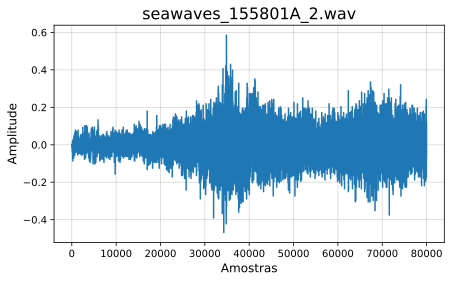

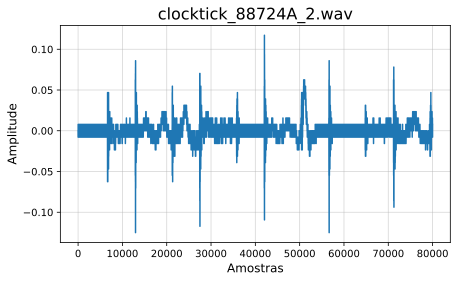

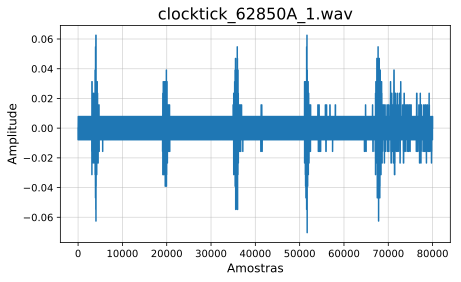

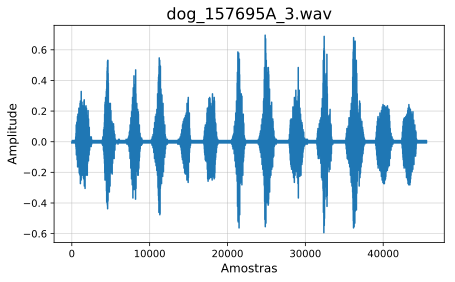

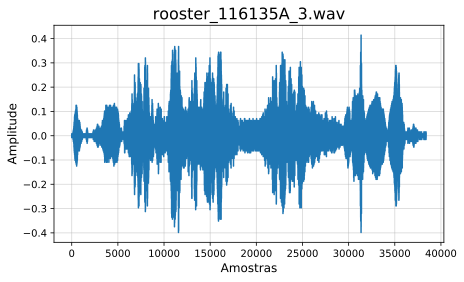

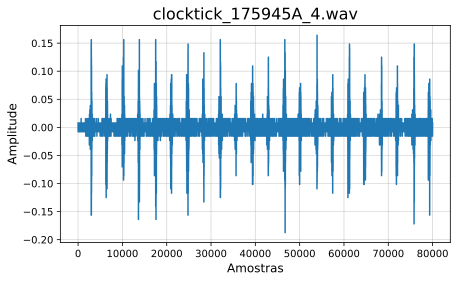

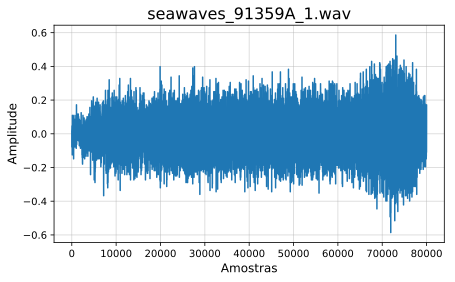

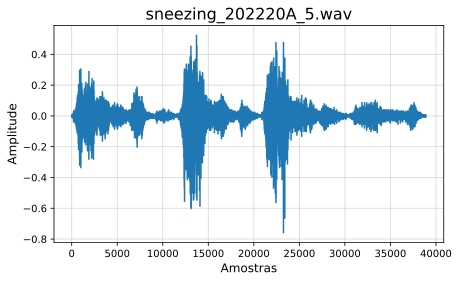

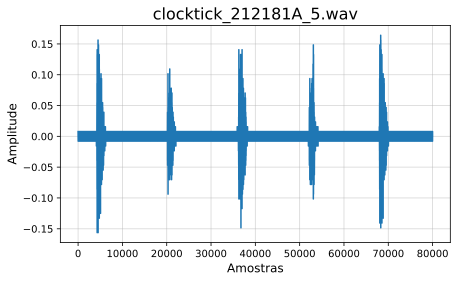

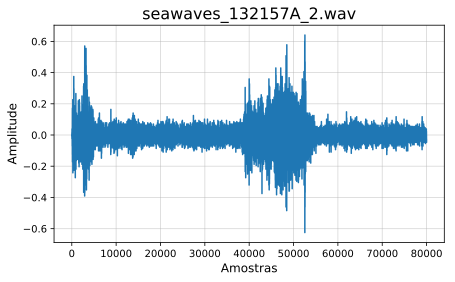

In [11]:
for i in range(10):
    audioEscolhido = audiosOriginais[random.randint(0,len(audiosOriginais)-1)]
    sinalOriginal, freqAmostragem = librosa.load(dirDestino + audioEscolhido, sr=None, mono=True)
    plotarSinal(sinalOriginal, audioEscolhido)